# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

## Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_raw = pd.read_csv(r'Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
pd.set_option('display.max_column', None)
data_raw.sample(2)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
257,puzzledUnicorn3,101135,Menikah,Wanita,FullTime,Digital Product Manager,Freshgraduate_program,Sangat_kurang,Jakarta Timur,LinkedIn,4,4.0,0.0,0.0,15.0,+6289989448xxx,puzzledUnicorn3199@outlook.com,Sarjana,1,NaN,NaN,1976-12-26,2013-07-08,2017-06-10,-
123,dopeyBass1,100398,Lainnya,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_kurang,Jakarta Utara,Google_Search,3,5.0,0.0,0.0,5.0,+6283144061xxx,dopeyBass1665@proton.com,Magister,1,NaN,masih_bekerja,1967-01-16,2011-01-10,2015-03-04,-


## Data Understanding

In [3]:
data_raw.shape

(287, 25)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [5]:
sum_missing = data_raw.isna().sum()
percent_missing = round(data_raw.isnull().sum() *100 / len(data_raw),2)
missing_value_df = pd.DataFrame({'feature_name': data_raw.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
missing_value_df.head(100)

,feature_name,sum_missing,percent_missing
19,IkutProgramLOP,258,89.90
20,AlasanResign,66,23.00
14,JumlahKetidakhadiran,6,2.09
11,SkorKepuasanPegawai,5,1.74
12,JumlahKeikutsertaanProjek,3,1.05
13,JumlahKeterlambatanSebulanTerakhir,1,0.35
23,TanggalPenilaianKaryawan,0,0.00
22,TanggalHiring,0,0.00
21,TanggalLahir,0,0.00
18,PernahBekerja,0,0.00


In [6]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [7]:
data_raw.select_dtypes(include='object').describe().T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


In [8]:
data_raw.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
IkutProgramLOP                          2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan          

## Preprocessing

### Feature Engineering

Sebelum melakukan preprocessing data lainnya, ada baiknya kita drop beberapa feature yang nantinya tidak/kurang berguna untuk analisis maupun untuk modeling:
1. Feature identitas seperti `Username, EnterpriseID, NomorHP,Email`
2. `IkutProgramLOP` karena mengandung terlalu banyak missing value
3. `TanggalPenilaianKaryawan` karena banyak ditemukan data yang kurang valid(tanggal penilaian setelah karyawan resign)

In [9]:
feature_drop = [# Identitas
                'Username',
                'EnterpriseID',
                'NomorHP',
                'Email',
                # Missing value > 80%
                'IkutProgramLOP',
                # Invalid
                'TanggalPenilaianKaryawan'
]

In [10]:
data_pre = data_raw.drop(feature_drop, axis=1)

In [11]:
data_pre.head(1)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,1,masih_bekerja,1972-07-01,2011-01-10,-


#### Labeling/Define Target

Dalam modeling ini, tujuan utamanya untuk memprediksi pengunduran diri karyawan berdasarkan dari perilaku, karakteristik, dan faktor lain dari feature yang tersedia. Oleh karena itu, target dari dataset ini menjelaskan apakah karyawan tersebut resign atau tidak
<br>
<br>
Dalam dataset ini feature `AlasanResign` dapat digunakan untuk menjelaskan apakah karyawan tersebut resign atau tidak

In [12]:
data_pre['AlasanResign'].value_counts()

masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

Feature `AlasanResign` memiliki beberapa value yang menjelaskan apakah karyawan tersebut `masih_bekerja` atau tidak, dan masing-masing alasan seorang karyawan memilih untuk resign
<br> Jadi untuk labeling kita akan membuat feature `resign` dengan value 0 (masih bekerja) dan 1(resign).
<br> Namun ada satu yang unik disini dimana ada `AlasanResign` dengan value `Product Design (UI & UX)` dimana hal tersebut adalah posisi dari karyawan tersebut.

In [13]:
data_pre[(data_pre['AlasanResign']=='Product Design (UI & UX)')].head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign
27,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,LinkedIn,3,5.0,0.0,0.0,15.0,Sarjana,1,Product Design (UI & UX),1987-04-10,2016-07-06,2016-08-07
124,Belum_menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,3,3.0,0.0,0.0,19.0,Sarjana,1,Product Design (UI & UX),1989-05-02,2011-9-26,2017-12-15
147,Menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,3,5.0,0.0,0.0,20.0,Sarjana,1,Product Design (UI & UX),1969-02-09,2012-03-07,2016-4-24
203,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Selatan,Website,3,5.0,0.0,0.0,9.0,Sarjana,1,Product Design (UI & UX),1988-08-29,2012-01-09,2018-04-01


Setelah diteliti lebih lanjut, karyawan dengan `AlasanResign` Product Design (UI & UX) sudah ada tanggal resignnya, jadi hal tersebut kemungkinan adalah kesalahan pada proses input data. Supaya tidak membingungkan, kita akan ganti menjadi 'Lainnya'

In [14]:
data_pre['AlasanResign'] = data_pre['AlasanResign'].replace({'Product Design (UI & UX)':'Lainnya'})

In [15]:
data_pre['AlasanResign'].isna().sum()

66

Terdapat 66 baris yang kosong dalam feature `AlasanResign` untuk memastikan akan diisi apa mari kita apakah karyawan tersebut sudah resign atau belum

In [16]:
data_res = data_pre[(data_pre['AlasanResign'].isnull()) & (data_pre['TanggalResign']=='-')]
data_res.shape

(66, 19)

Hal tersebut membuktikan bahwa pada feature `AlasanResign` baris yang kosong merupakan karyawan yang masih bekerja semua, oleh karena itu kita akan imputasi masih_bekerja pada baris yang kosong

In [17]:
data_pre['AlasanResign'].fillna('masih_bekerja', inplace=True)

In [18]:
data_pre['resign'] = np.where((data_pre['AlasanResign']=='masih_bekerja'), 0, 1)

In [19]:
data_pre['resign'].value_counts(normalize=True)*100

0    68.989547
1    31.010453
Name: resign, dtype: float64

### Feature Modification

#### TanggalLahir

Dengan feature tanggal lahir kita akan memodifikasinya menjadi feature umur. Jika dilihat dari feature tanggal lainnya, dataset ini memuat informasi karyawan sampai dengan tahun 2020, dengan asumsi bahwa dataset ini digunakan pada awal tahun 2021, maka dengan mengurangi tanggal 2021-01-01 dengan `TanggalLahir` kita bisa mengetahui umur dari masing-masing karyawan

In [20]:
data_pre['TanggalLahir'].head(2)

0    1972-07-01
1    1984-04-26
Name: TanggalLahir, dtype: object

In [21]:
data_pre['TanggalLahir'] = pd.to_datetime(data_pre['TanggalLahir'], format='%Y-%m-%d')
data_pre['umur'] = round(pd.to_numeric((pd.to_datetime('2021-01-01') - data_pre['TanggalLahir']) / np.timedelta64(1, 'Y')))

In [22]:
data_pre['umur'].describe()

count    287.000000
mean      41.864111
std        8.873962
min       28.000000
25%       35.000000
50%       40.000000
75%       47.000000
max       70.000000
Name: umur, dtype: float64

#### TanggalHiring dan TanggalResign

Dari kedua feature ini kita dapat mengetahui berapa lama waktu dari seorang karyawan bekerja dalam bulan dengan cara `TanggalResign` dikurangi `TanggalHiring`. Untuk karyawan yang masih bekerja, akan dikurangi dengan tanggal 2021-01-01

In [23]:
# mengisi TanggalResign dengan 2020-12-01 untuk karyawan yang belum resign
data_pre['TanggalResign'] = data_pre['TanggalResign'].where(data_pre['TanggalResign'] != '-', '2021-01-01')

In [24]:
data_pre['TanggalHiring'] = pd.to_datetime(data_pre['TanggalHiring'],format='%Y-%m-%d')
data_pre['TanggalResign'] = pd.to_datetime(data_pre['TanggalResign'],format='%Y-%m-%d')

In [25]:
# hitung perbedaan tanggal
data_pre['LamaBekerja'] = data_pre['TanggalResign'] - data_pre['TanggalHiring']
# konversi perbedaan tanggal ke tahun
data_pre['LamaBekerja'] = round(data_pre['LamaBekerja'].apply(lambda x: x.days/365))

In [26]:
data_pre['LamaBekerja'].describe()

count    287.000000
mean       6.749129
std        2.867674
min       -4.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       15.000000
Name: LamaBekerja, dtype: float64

In [27]:
data_pre[data_pre['LamaBekerja']<0].head(3)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,resign,umur,LamaBekerja
108,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,10.0,Sarjana,1,toxic_culture,1976-09-22,2015-03-30,2014-08-19,1,44.0,-1.0
207,Menikah,Wanita,FullTime,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Pusat,Indeed,4,3.0,5.0,0.0,17.0,Sarjana,1,leadership,1972-11-21,2017-01-07,2013-05-30,1,48.0,-4.0


Setelah dilakukan proses diatas, terdapat 2 karyawan yang `LamaBekerja`nya bervalue minus, setelah diselidiki hal tersebut karena TanggalResign lebih awal dari TanggalHiring. Asumsi terkuatnya adalah kesalahan input sehingga kedua tanggal tersebut terbalik, namun untuk saat ini kita akan drop saja kedua karyawan tersebut

In [28]:
data_pre.drop(data_pre[data_pre['LamaBekerja']<0].index, inplace=True)

### Missing Value

In [29]:
sum_missing = data_pre.isna().sum()
percent_missing = round(data_pre.isnull().sum() *100 / len(data_pre),2)
missing_value = pd.DataFrame({'feature_name': data_pre.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
pd.set_option('display.max_rows', None)
missing_value.head(4)

,feature_name,sum_missing,percent_missing
12,JumlahKetidakhadiran,6,2.11
9,SkorKepuasanPegawai,5,1.75
10,JumlahKeikutsertaanProjek,3,1.05
11,JumlahKeterlambatanSebulanTerakhir,1,0.35


In [30]:
data_pre['JumlahKetidakhadiran'].fillna(0, inplace=True)
data_pre['SkorKepuasanPegawai'].fillna(0, inplace=True)
data_pre['JumlahKeikutsertaanProjek'].fillna(0, inplace=True)
data_pre['JumlahKeterlambatanSebulanTerakhir'].fillna(0, inplace=True)

### Feature Selection

In [31]:
hm = data_pre.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='PuRd',
                template='plotly_dark',width=900,height=900)
fig.show()

#### Checking Nunique

In [32]:
data_pre.select_dtypes(include='object').nunique()

StatusPernikahan       5
JenisKelamin           2
StatusKepegawaian      3
Pekerjaan             14
JenjangKarir           3
PerformancePegawai     5
AsalDaerah             5
HiringPlatform         9
TingkatPendidikan      3
PernahBekerja          2
AlasanResign          11
dtype: int64

In [33]:
objects = data_pre.dtypes[data_pre.dtypes == "object"].index

In [34]:
for col in objects:
    print(f'''Value count feature {col}:''')
    print(data_pre[col].value_counts())
    print()

Value count feature StatusPernikahan:
Belum_menikah    131
Menikah           56
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value count feature JenisKelamin:
Wanita    165
Pria      120
Name: JenisKelamin, dtype: int64

Value count feature StatusKepegawaian:
FullTime      215
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count feature Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      71
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       15
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int6

Terlihat bahwa pada feature `PernahBekerja` walaupun ada 2 unique value namun kedua value tersebut punya maksud yang sama sehingga hanya ada 1 unique value pada feature tersebut, oleh sebab itu feature `PernahBekerja` akan di drop
<br> Pada feature `StatusPernikahan` terdapat value "-", value tersebut akan dimerge dengan value "Lainnya"

In [35]:
data_pre.drop(['PernahBekerja','AsalDaerah'], axis=1, inplace=True)

In [36]:
data_pre['StatusPernikahan'] = data_pre['StatusPernikahan'].replace({'-':'Lainnya'})

In [37]:
data_pre.shape

(285, 20)

In [38]:
data_pre.sample(5)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,resign,umur,LamaBekerja
172,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Indeed,4,4.0,0.0,0.0,8.0,Sarjana,masih_bekerja,1990-04-19,2014-05-05,2021-01-01,0,31.0,7.0
41,Lainnya,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Bagus,Indeed,3,3.0,0.0,0.0,4.0,Magister,masih_bekerja,1963-10-30,2014-09-29,2021-01-01,0,57.0,6.0
180,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Google_Search,3,5.0,0.0,0.0,1.0,Magister,masih_bekerja,1983-12-08,2013-09-30,2021-01-01,0,37.0,7.0
113,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Indeed,4,5.0,0.0,0.0,2.0,Sarjana,masih_bekerja,1989-03-31,2013-07-08,2021-01-01,0,32.0,7.0
200,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Sangat_kurang,Google_Search,3,4.0,0.0,0.0,13.0,Sarjana,masih_bekerja,1977-03-23,2011-11-28,2021-01-01,0,44.0,9.0


## Annual Report on Employee Number Changes

In [39]:
data_an = data_pre.copy()

### Extract Tahun dari TanggalHiring dan TanggalResign

In [40]:
data_an['tahun_hiring'] = pd.DatetimeIndex(data_an['TanggalHiring']).year
data_an['tahun_resign'] = pd.DatetimeIndex(data_an['TanggalResign']).year

### Tabel Hiring Agregat Per Tahun

In [41]:
#tabel agregat karyawan yang masuk
hire_agg = data_an.groupby(['tahun_hiring']).size().reset_index(name='jumlah_employee')
hire_agg

,tahun_hiring,jumlah_employee
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,30


### Tabel Resign Agregat Per Tahun

In [42]:
#tabel agregat karyawan yang keluar
resign_agg = data_an.groupby(['tahun_resign']).size().reset_index(name='jumlah_employee')
resign_agg

,tahun_resign,jumlah_employee
0,2013,4
1,2014,11
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6
8,2021,198


Terlihat bahwa ada tahun resign 2021, hal tersebut karena pada tahap preprocessing sebelumnya kita mengimputasi TanggalResign dengan 2021-01-01 bagi karyawan yang belum resign, maka dari itu pada saat merge dengan tabel hiring akan kita hapus tahun 2021

In [43]:
# outer join the two table based on year_hiring and year_resign
data_hiring_resign = pd.merge(hire_agg, resign_agg, left_on='tahun_hiring', right_on='tahun_resign', how='outer')
# use fillna() function to fill missing values with 0
data_hiring_resign.fillna(0, inplace=True)
# combine tahun_hiring and tahun_resign into one column 'tahun'
data_hiring_resign['tahun'] = data_hiring_resign[['tahun_hiring', 'tahun_resign']].max(axis=1)
# drop tahun_hiring and tahun_resign
data_hiring_resign.drop(['tahun_hiring','tahun_resign'], axis=1, inplace=True)
data_hiring_resign = data_hiring_resign[data_hiring_resign['tahun'] != 2021]
data_hiring_resign.rename(columns={'jumlah_employee_x': 'Hired', 'jumlah_employee_y': 'Resigned'}, inplace=True)
data_hiring_resign

,Hired,Resigned,tahun
0,1.0,0.0,2006.0
1,2.0,0.0,2007.0
2,2.0,0.0,2008.0
3,7.0,0.0,2009.0
4,8.0,0.0,2010.0
5,76.0,0.0,2011.0
6,41.0,0.0,2012.0
7,43.0,4.0,2013.0
8,56.0,11.0,2014.0
9,30.0,8.0,2015.0


In [44]:
min_tahun = data_hiring_resign['tahun'].min()
max_tahun = data_hiring_resign['tahun'].max()
fig = px.line(data_hiring_resign, x='tahun', y=['Hired','Resigned'], title='Jumlah Employee Hired dan Resigned',
              template='plotly_dark',width=1200,height=800)
years = np.arange(min_tahun, max_tahun + 1)
fig.update_layout(xaxis={'tickvals':years, 'ticktext':years})
fig.data[0].line.smoothing = True
fig.data[0].line.shape = 'spline'
fig.data[0].line.color = 'green'
fig.data[1].line.smoothing = True
fig.data[1].line.shape = 'spline'
fig.data[1].line.color = 'red'
annotations = []
for i in range(1, len(data_hiring_resign)):
    jumlah_hire = data_hiring_resign.iloc[i]['Hired']
    jumlah_resign = data_hiring_resign.iloc[i]['Resigned']
    tahun = data_hiring_resign.iloc[i]['tahun']
    jumlah_hire_sebelumnya = data_hiring_resign.iloc[i-1]['Hired']
    jumlah_resign_sebelumnya = data_hiring_resign.iloc[i-1]['Resigned']
    if jumlah_hire != 0 and jumlah_hire_sebelumnya!= 0:
        persentase_kenaikan_hire = (jumlah_hire - jumlah_hire_sebelumnya) / jumlah_hire_sebelumnya * 100
        if persentase_kenaikan_hire != 0:
            if persentase_kenaikan_hire >= 0:
                annotation_x = f'+{persentase_kenaikan_hire:.1f}%'
            else:
                annotation_x = f'{persentase_kenaikan_hire:.1f}%'
            annotations.append(dict(x=tahun, y=jumlah_hire, text=annotation_x, showarrow=True, arrowhead=2, ax=0, ay=-40))
    if jumlah_resign != 0 and jumlah_resign_sebelumnya!= 0:
        persentase_kenaikan_y = (jumlah_resign - jumlah_resign_sebelumnya) / jumlah_resign_sebelumnya * 100
        if persentase_kenaikan_y != 0:
            if persentase_kenaikan_y >= 0:
                annotation_y = f'+{persentase_kenaikan_y:.1f}%'
            else:
                annotation_y = f'{persentase_kenaikan_y:.1f}%'
            annotations.append(dict(x=tahun, y=jumlah_resign, text=annotation_y, showarrow=True, arrowhead=2, ax=0, ay=40))
for annotation in annotations:
    fig.add_annotation(annotation)
fig.show()

Beberapa insight yang bisa digali dari chart diatas:
1. Terlihat bahwa perusahaan mulai berkembang pesat pada tahun `2011` yang dibuktikan dengan hiring karyawan hingga `76`.
2. Dari tahun `2014-2020` hiring berangsur-angsur menurun setiap tahunnya, kemungkinan karena belum ada perkembangan yang berarti dari perusahaan.
3. Dari tahun `2016-2017` terjadi peningkatan yang cukup signifikan pada jumlah karyawan yang resign yaitu `8` ke `19` orang`(+137.5%)`. 
4. Hal tersebut terus belangsung hingga tahun `2018` yang merupakan puncak terbanyak karyawan resign yaitu `26` orang, ditambah hiring yang terus menurun
5. Tahun `2019-2020` total yang resign ada 9 orang namun tidak ada hiring sama sekali

## Resign Reason Analysis for Employee Attrition Management Strategy

In [45]:
data_an2 = data_an.copy()

### Perbandingan Resigned Employee dengan Existing Employee

In [46]:
data_resigned = data_an2[data_an2['resign'] != 0].groupby(['Pekerjaan']).size().reset_index(name='jumlah_employee').sort_values(by='jumlah_employee', ascending=False)
data_resigned

,Pekerjaan,jumlah_employee
5,Software Engineer (Back End),28
6,Software Engineer (Front End),27
2,Product Design (UI & UX),9
0,Data Analyst,7
4,Software Engineer (Android),7
3,Product Manager,6
1,Data Engineer,3


In [47]:
data_existing = data_an2[data_an2['resign'] == 0].groupby(['Pekerjaan']).size().reset_index(name='jumlah_employee').sort_values(by='jumlah_employee', ascending=False)
data_existing

,Pekerjaan,jumlah_employee
11,Software Engineer (Back End),81
12,Software Engineer (Front End),44
10,Software Engineer (Android),17
5,Product Design (UI & UX),15
7,Product Manager,11
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
8,Scrum Master,3
13,Software Engineer (iOS),3


In [48]:
merge_resign_exist = pd.merge(data_existing, data_resigned, on='Pekerjaan', how='outer')
merge_resign_exist.rename(columns={'jumlah_employee_x': 'Existing', 'jumlah_employee_y': 'Resigned'}, inplace=True)
merge_resign_exist.fillna(0, inplace=True)
merge_resign_exist

,Pekerjaan,Existing,Resigned
0,Software Engineer (Back End),81,28.0
1,Software Engineer (Front End),44,27.0
2,Software Engineer (Android),17,7.0
3,Product Design (UI & UX),15,9.0
4,Product Manager,11,6.0
5,Data Analyst,8,7.0
6,Data Engineer,7,3.0
7,DevOps Engineer,3,0.0
8,Scrum Master,3,0.0
9,Software Engineer (iOS),3,0.0


In [49]:
merge_resign_exist['Total Employee'] = merge_resign_exist['Existing'] + merge_resign_exist['Resigned']
merge_resign_exist['Persentase Resign Employee'] = round(merge_resign_exist['Resigned'] / merge_resign_exist['Total Employee']*100,1)
merge_resign_exist.sort_values(by='Persentase Resign Employee',ascending=False)

,Pekerjaan,Existing,Resigned,Total Employee,Persentase Resign Employee
5,Data Analyst,8,7.0,15.0,46.7
1,Software Engineer (Front End),44,27.0,71.0,38.0
3,Product Design (UI & UX),15,9.0,24.0,37.5
4,Product Manager,11,6.0,17.0,35.3
6,Data Engineer,7,3.0,10.0,30.0
2,Software Engineer (Android),17,7.0,24.0,29.2
0,Software Engineer (Back End),81,28.0,109.0,25.7
7,DevOps Engineer,3,0.0,3.0,0.0
8,Scrum Master,3,0.0,3.0,0.0
9,Software Engineer (iOS),3,0.0,3.0,0.0


In [50]:
fig = px.bar(merge_resign_exist, y='Pekerjaan', x=['Existing','Resigned'],
             orientation='h',barmode='stack',
             labels={'Pekerjaan':'Divisi', 'Existing':'Existing Employee', 'Resigned':'Resigned Employee','value':'Total Employee(Existing Employee(%))'},
             height=800,width=1000,template="plotly_dark")

# Add the annotations for persentase
for i in range(len(merge_resign_exist)):
    fig.add_annotation(y=merge_resign_exist.iloc[i]['Pekerjaan'], x=merge_resign_exist.iloc[i]['Existing'],
                      text='{:.1f}%'.format(merge_resign_exist.iloc[i]['Persentase Resign Employee']),
                      font=dict(size=10),
                      showarrow=False,
                      align='center', xanchor='left', yanchor='middle')
fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()

### Alasan Resign pada divisi Data Analyst (Divisi dengan persentase Resign paling tinggi(46.7%))

In [51]:
divisi_persen_resign_tertinggi = data_an2[(data_an2['Pekerjaan']== 'Data Analyst')&(data_an2['resign']==1)]

#### Berdasarkan Tahun Resign

In [52]:
agg_tahun1 = divisi_persen_resign_tertinggi.groupby(['tahun_resign']).agg({'resign':'sum'}).reset_index()
agg_tahun1.sort_values(by='resign', ascending=False)

,tahun_resign,resign
2,2017,3
3,2018,2
0,2014,1
1,2015,1


#### Berdasarkan Jenjang Karir

In [53]:
agg_jenjangkarir1 = divisi_persen_resign_tertinggi.groupby(['JenjangKarir']).agg({'resign':'sum'}).reset_index()
agg_jenjangkarir1

,JenjangKarir,resign
0,Freshgraduate_program,7


#### Berdasarkan Alasan Resign

In [54]:
agg_alasan1 = divisi_persen_resign_tertinggi.groupby(['AlasanResign']).agg({'resign':'sum'}).reset_index()
agg_alasan1.sort_values(by='resign', ascending=False)

,AlasanResign,resign
1,toxic_culture,5
0,internal_conflict,2


#### Berdasarkan Perfomance

In [55]:
agg_performance1 = divisi_persen_resign_tertinggi.groupby(['PerformancePegawai']).agg({'resign':'sum'}).reset_index()
agg_performance1.sort_values(by='resign', ascending=False)

,PerformancePegawai,resign
2,Sangat_bagus,4
0,Bagus,1
1,Biasa,1
3,Sangat_kurang,1


In [56]:
agg_all1 = divisi_persen_resign_tertinggi.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign','tahun_resign']).agg({'resign':'sum'}).reset_index()
agg_all1

,JenjangKarir,PerformancePegawai,AlasanResign,tahun_resign,resign
0,Freshgraduate_program,Bagus,toxic_culture,2014,1
1,Freshgraduate_program,Biasa,internal_conflict,2017,1
2,Freshgraduate_program,Sangat_bagus,internal_conflict,2017,1
3,Freshgraduate_program,Sangat_bagus,toxic_culture,2015,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,2017,1
5,Freshgraduate_program,Sangat_bagus,toxic_culture,2018,1
6,Freshgraduate_program,Sangat_kurang,toxic_culture,2018,1


In [57]:
fig = px.sunburst(agg_all1.reset_index(), path=['tahun_resign','AlasanResign','PerformancePegawai'], values='resign',
                  hover_data=['resign'], template='plotly_dark', width=750, height=750,color_continuous_scale='PuRd',
                  title='Alasan Resign Pada Divisi Data Analyst')
fig.show()

Dari Sunburst diatas bisa dilihat:
1. Semua Data Analyst yang resign berasal dari FG program
2. Dari Tahun 2014 - 2015 mayoritas employee yang resign memiliki alasan toxic culture, ataupun internal confilct dimana pada umumnya terjadi karena toxic culture
3. Hampir semua employee yang resign memiliki performa bagus hingga sangat bagus

### Alasan Resign pada divisi Software Engineer Back End (Divisi dengan Resign paling tinggi)

In [58]:
divisi_resign_tertinggi = data_an2[(data_an2['Pekerjaan']== 'Software Engineer (Back End)')&(data_an2['resign']==1)]

#### Berdasarkan Tahun Resign

In [59]:
agg_tahun = divisi_resign_tertinggi.groupby(['tahun_resign']).agg({'resign':'sum'}).reset_index()
agg_tahun.sort_values(by='resign', ascending=False)

,tahun_resign,resign
5,2018,10
2,2015,5
4,2017,5
1,2014,3
6,2019,2
0,2013,1
3,2016,1
7,2020,1


#### Berdasarkan Jenjang Karir

In [60]:
agg_jenjangkarir = divisi_resign_tertinggi.groupby(['JenjangKarir']).agg({'resign':'sum'}).reset_index()
agg_jenjangkarir

,JenjangKarir,resign
0,Freshgraduate_program,15
1,Mid_level,7
2,Senior_level,6


#### Berdasarkan Alasan Resign

In [61]:
agg_alasan = divisi_resign_tertinggi.groupby(['AlasanResign']).agg({'resign':'sum'}).reset_index()
agg_alasan.sort_values(by='resign', ascending=False)

,AlasanResign,resign
3,jam_kerja,6
6,tidak_bahagia,5
1,ganti_karir,4
4,kejelasan_karir,4
7,tidak_bisa_remote,3
2,internal_conflict,2
5,leadership,2
0,Lainnya,1
8,toxic_culture,1


#### Berdasarkan Perfomance

In [62]:
agg_performance = divisi_resign_tertinggi.groupby(['PerformancePegawai']).agg({'resign':'sum'}).reset_index()
agg_performance.sort_values(by='resign', ascending=False)

,PerformancePegawai,resign
3,Sangat_bagus,11
1,Biasa,9
0,Bagus,3
2,Kurang,3
4,Sangat_kurang,2


Dari total 28 yang resign ternyata ada 11 orang yang resign dengan performa sangat bagus

In [63]:
agg_all = divisi_resign_tertinggi.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).agg({'resign':'sum'}).reset_index()
agg_all

,JenjangKarir,PerformancePegawai,AlasanResign,resign
0,Freshgraduate_program,Bagus,kejelasan_karir,1
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,ganti_karir,2
3,Freshgraduate_program,Biasa,jam_kerja,1
4,Freshgraduate_program,Biasa,kejelasan_karir,1
5,Freshgraduate_program,Biasa,leadership,1
6,Freshgraduate_program,Biasa,tidak_bisa_remote,1
7,Freshgraduate_program,Kurang,ganti_karir,1
8,Freshgraduate_program,Kurang,jam_kerja,1
9,Freshgraduate_program,Kurang,tidak_bahagia,1


In [64]:
fig = px.sunburst(agg_all.reset_index(), path=['AlasanResign','JenjangKarir', 'PerformancePegawai'], values='resign',
                  hover_data=['resign'], template='plotly_dark', width=1000, height=1000,color_continuous_scale='PuRd',
                  title='Alasan Resign Pada Divisi Software Engineer (Back End)')
fig.show()

Dari Sunburst diatas bisa dilihat:
1. Dua alasan resign paling umum yaitu jam kerja(6) dan tidak bahagia(5)
2. Divisi ini paling banyak resign dari jenjang karir FG Program(15)
3. Terlepas dari alasannya sebanyak 11 orang yang resign memiliki performa sangat bagus, biasanya hal tersebut tejadi karena kurangnya apresiasi company terhadap kinerja baiknya, namun tidak ditemukan adanya alasan perihal apresiasi.

## Modelling and Evaluation

### Feature Encoding

In [65]:
data_pre.select_dtypes(include='object').nunique()

StatusPernikahan       4
JenisKelamin           2
StatusKepegawaian      3
Pekerjaan             14
JenjangKarir           3
PerformancePegawai     5
HiringPlatform         9
TingkatPendidikan      3
AlasanResign          11
dtype: int64

In [66]:
objects1 = data_pre.dtypes[data_pre.dtypes == "object"].index
for col in objects1:
    print(f'''Value count feature {col}:''')
    print(data_pre[col].value_counts())
    print()

Value count feature StatusPernikahan:
Belum_menikah    131
Menikah           56
Lainnya           51
Bercerai          47
Name: StatusPernikahan, dtype: int64

Value count feature JenisKelamin:
Wanita    165
Pria      120
Name: JenisKelamin, dtype: int64

Value count feature StatusKepegawaian:
FullTime      215
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count feature Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      71
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       15
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int64

Value count featur

#### One Hot Encoding

In [67]:
data_pre.drop(['HiringPlatform'], axis=1, inplace=True)

In [68]:
to_onehot = ['StatusPernikahan', 'StatusKepegawaian','Pekerjaan']
for onehot in to_onehot:
    onehots = pd.get_dummies(data_pre[onehot], prefix=onehot)
    data_pre = data_pre.join(onehots)
# Drop feature yang sudah di encode
data_pre = data_pre.drop(columns=to_onehot).copy()

In [69]:
data_pre.sample(1)

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,resign,umur,LamaBekerja,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS)
212,Wanita,Freshgraduate_program,Sangat_bagus,3,4.0,0.0,0.0,5.0,Doktor,leadership,1986-07-20,2011-05-16,2018-06-08,1,34.0,7.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
# Label Encoding dengan LabelEncoder
le = LabelEncoder()
to_label = ['JenisKelamin','JenjangKarir']
for label in to_label:
    data_pre[label]=data_pre[[label]].apply(le.fit_transform)

In [72]:
data_pre['PerformancePegawai'].value_counts()

Biasa            84
Bagus            74
Sangat_bagus     72
Kurang           31
Sangat_kurang    24
Name: PerformancePegawai, dtype: int64

In [73]:
# Label Encoding dengan replace
data_pre['PerformancePegawai'] = data_pre['PerformancePegawai'].replace({'Sangat_kurang':0,
                                                                         'Kurang':1,
                                                                         'Biasa':2,
                                                                         'Bagus':3,
                                                                         'Sangat_bagus':4})

In [74]:
# Label Encoding dengan replace
data_pre['TingkatPendidikan'] = data_pre['TingkatPendidikan'].replace({'Sarjana':0,
                                                                       'Magister':1,
                                                                       'Doktor':2})

In [75]:
data_pre = data_pre.drop(columns=['AlasanResign','TanggalLahir','TanggalHiring','TanggalResign'])

In [76]:
hm = data_pre.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='PuRd',
                template='plotly_dark',width=900,height=900)
fig.show()

In [77]:
corr_matrix = data_pre.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [78]:
to_drop_hicorr

['StatusKepegawaian_Outsource']

In [79]:
data_pre.drop(to_drop_hicorr, axis=1, inplace=True)

In [80]:
data_model = data_pre.copy()

### Train-Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = data_model.drop('resign', axis=1)
y = data_model['resign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train.shape, X_test.shape

((228, 31), (57, 31))

### Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns= X_train.columns)

In [86]:
X_train.head()

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,umur,LamaBekerja,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS)
0,1.0,0.0,1.00,0.25,1.0,0.000000,0.000000,0.072727,1.0,0.195122,0.333333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.50,0.25,0.0,0.857143,0.666667,0.236364,0.5,0.121951,0.400000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.00,0.50,1.0,1.000000,0.000000,0.036364,0.0,0.121951,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.75,0.25,1.0,0.000000,0.000000,0.290909,0.0,0.195122,0.600000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.25,0.50,1.0,0.000000,0.000000,0.127273,0.0,0.414634,0.800000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Oversampling

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
smoteenn = SMOTE(random_state=42, sampling_strategy='minority')
X_train_over, y_train_over = smoteenn.fit_resample(X_train, y_train)

In [93]:
X_train_over.shape

(310, 31)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
from sklearn.model_selection import learning_curve

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_over)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_over)
    strat_k_fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    
    print("Accuracy (Train Set): %.3f" % accuracy_score(y_train_over, y_pred_train))
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.3f" % precision_score(y_train_over, y_pred_train))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.3f" % recall_score(y_train_over, y_pred_train))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.3f" % f1_score(y_train_over, y_pred_train))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train_over, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print()
    print('-------CROSS-VALIDATION-------')
    score_acc = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): %.3f' % score_acc['train_score'].mean())
    print('Accuracy (crossval test): %.3f' % score_acc['test_score'].mean())
    score_pre = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='precision', return_train_score=True)
    print('Precision (crossval train): %.3f' % score_pre['train_score'].mean())
    print('Precision (crossval test): %.3f' % score_pre['test_score'].mean())
    score_re = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='recall', return_train_score=True)
    print('Recall (crossval train): %.3f' % score_re['train_score'].mean())
    print('Recall (crossval test): %.3f' % score_re['test_score'].mean())
    score_f1 = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='f1', return_train_score=True)
    print('F1-Score (crossval train): %.3f' % score_f1['train_score'].mean())
    print('F1-Score (crossval test): %.3f' % score_f1['test_score'].mean())
    score = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): %.3f' % score['train_score'].mean())
    print('roc_auc (crossval test): %.3f' % score['test_score'].mean())

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [95]:
def plot_learning_curve(estimator, title, X_train_over, y_train_over, X_test, y_test, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Sizes")
    plt.ylabel("ROC_AUC Score")

    train_scores = cross_val_score(estimator, X_train_over, y_train_over, cv=cv, scoring='roc_auc')
    test_scores = cross_val_score(estimator, X_test, y_test, cv=cv, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores)
    test_scores_mean = np.mean(test_scores)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train_over, y_train_over, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    for i, j in zip(train_sizes, train_scores_mean):
        plt.text(i, j, format(j, '.3f'), ha='center', va='bottom', rotation=45)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")
    for i, j in zip(train_sizes, test_scores_mean):
        plt.text(i, j, format(j, '.3f'), ha='center', va='bottom', rotation=45)

    plt.legend(loc="best")
    return plt

In [96]:
strat_k_fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

### Fit Model

#### Logistic Regression

In [97]:
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)
eval_classification(lr)

Accuracy (Train Set): 0.835
Accuracy (Test Set): 0.754
Precision (Train Set): 0.861
Precision (Test Set): 0.000
Recall (Test Set): 0.800
Recall (Test Set): 0.000
F1-Score (Test Set): 0.829
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.919
roc_auc (test-proba): 0.849

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.819
Accuracy (crossval test): 0.790
Precision (crossval train): 0.833
Precision (crossval test): 0.817
Recall (crossval train): 0.800
Recall (crossval test): 0.755
F1-Score (crossval train): 0.816
F1-Score (crossval test): 0.783
roc_auc (crossval train): 0.919
roc_auc (crossval test): 0.870


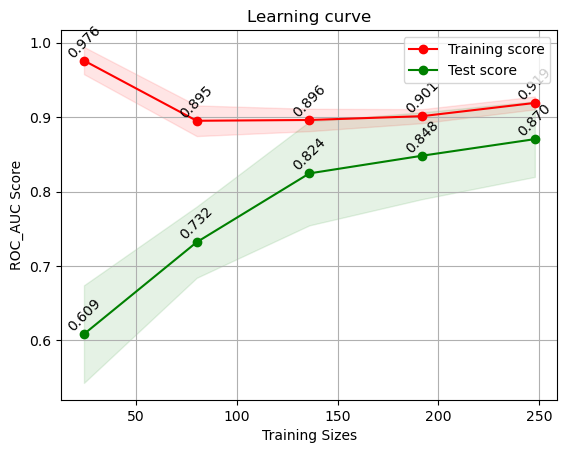

In [103]:
plot_learning_curve(lr, "Learning curve", X_train_over, y_train_over, X_test, y_test, cv=strat_k_fold,n_jobs=-1)
plt.show()

#### Decision Tree

In [142]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_over, y_train_over)
eval_classification(dt)

Accuracy (Train Set): 0.881
Accuracy (Test Set): 0.754
Precision (Train Set): 0.888
Precision (Test Set): 0.000
Recall (Train Set): 0.871
Recall (Test Set): 0.000
F1-Score (Train Set): 0.879
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.945
roc_auc (test-proba): 0.536

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.888
Accuracy (crossval test): 0.813
Precision (crossval train): 0.909
Precision (crossval test): 0.832
Recall (crossval train): 0.863
Recall (crossval test): 0.787
F1-Score (crossval train): 0.885
F1-Score (crossval test): 0.807
roc_auc (crossval train): 0.950
roc_auc (crossval test): 0.879


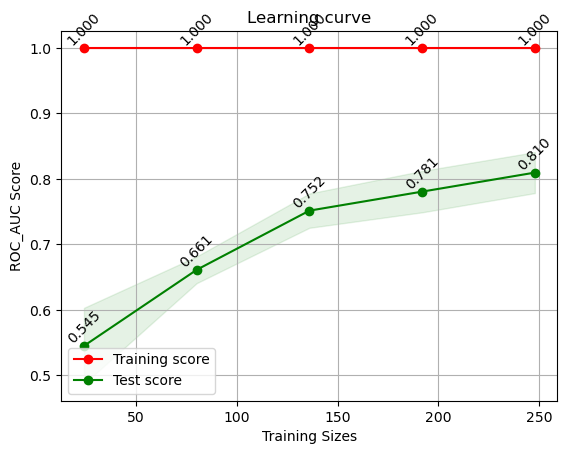

In [105]:
plot_learning_curve(dt, "Learning curve", X_train_over, y_train_over, X_test, y_test, cv=strat_k_fold,n_jobs=-1)
plt.show()

#### k-Nearest Neighbors

In [119]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_over, y_train_over)
eval_classification(knn)

Accuracy (Train Set): 0.777
Accuracy (Test Set): 0.754
Precision (Train Set): 0.724
Precision (Test Set): 0.000
Recall (Test Set): 0.897
Recall (Test Set): 0.000
F1-Score (Test Set): 0.801
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.896
roc_auc (test-proba): 0.649

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.763
Accuracy (crossval test): 0.658
Precision (crossval train): 0.709
Precision (crossval test): 0.615
Recall (crossval train): 0.894
Recall (crossval test): 0.845
F1-Score (crossval train): 0.790
F1-Score (crossval test): 0.712
roc_auc (crossval train): 0.882
roc_auc (crossval test): 0.730


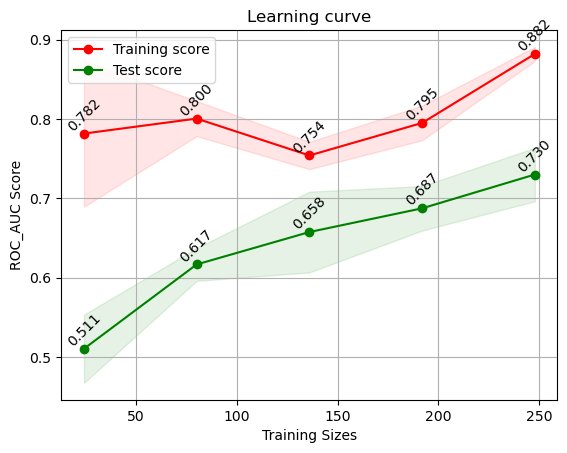

In [120]:
plot_learning_curve(knn, "Learning curve", X_train_over, y_train_over, X_test, y_test, cv=strat_k_fold,n_jobs=-1)
plt.show()

#### Random Forest

In [121]:
rf = RandomForestClassifier(max_depth=4, random_state=42)
rf.fit(X_train_over, y_train_over)
eval_classification(rf)

Accuracy (Train Set): 0.903
Accuracy (Test Set): 0.772
Precision (Train Set): 0.956
Precision (Test Set): 1.000
Recall (Test Set): 0.845
Recall (Test Set): 0.071
F1-Score (Test Set): 0.897
F1-Score (Test Set): 0.133
roc_auc (train-proba): 0.978
roc_auc (test-proba): 0.367

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.909
Accuracy (crossval test): 0.868
Precision (crossval train): 0.957
Precision (crossval test): 0.921
Recall (crossval train): 0.856
Recall (crossval test): 0.806
F1-Score (crossval train): 0.904
F1-Score (crossval test): 0.858
roc_auc (crossval train): 0.983
roc_auc (crossval test): 0.916


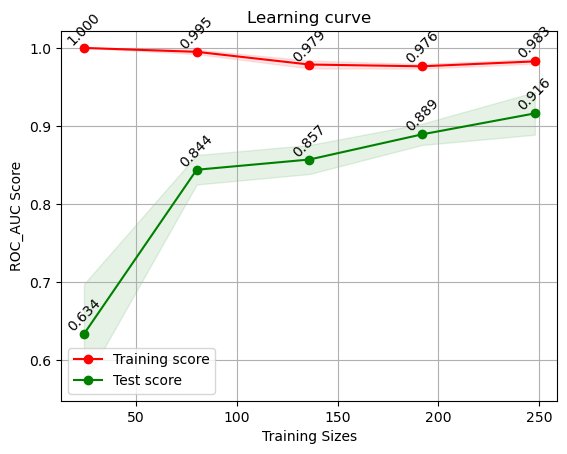

In [122]:
plot_learning_curve(rf, "Learning curve", X_train_over, y_train_over, X_test, y_test, cv=strat_k_fold,n_jobs=-1)
plt.show()

#### Extreme Gradient Boosting (XGBoost)

In [126]:
xgb = XGBClassifier(max_depth=5,random_state=42)
xgb.fit(X_train_over, y_train_over)
eval_classification(xgb)

Accuracy (Train Set): 1.000
Accuracy (Test Set): 0.772
Precision (Train Set): 1.000
Precision (Test Set): 1.000
Recall (Test Set): 1.000
Recall (Test Set): 0.071
F1-Score (Test Set): 1.000
F1-Score (Test Set): 0.133
roc_auc (train-proba): 1.000
roc_auc (test-proba): 0.419

-------CROSS-VALIDATION-------
Accuracy (crossval train): 1.000
Accuracy (crossval test): 0.842
Precision (crossval train): 1.000
Precision (crossval test): 0.854
Recall (crossval train): 1.000
Recall (crossval test): 0.826
F1-Score (crossval train): 1.000
F1-Score (crossval test): 0.838
roc_auc (crossval train): 1.000
roc_auc (crossval test): 0.926


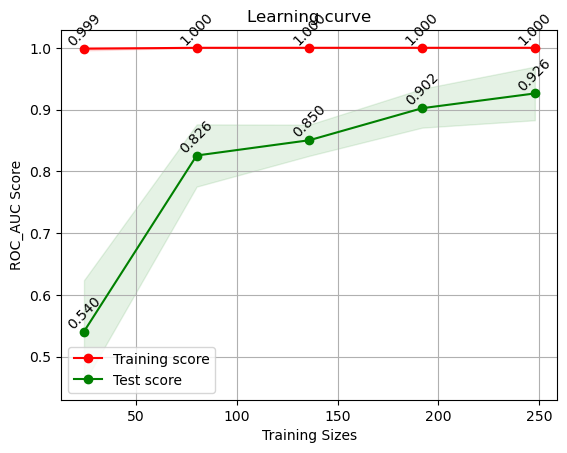

In [127]:
plot_learning_curve(xgb, "Learning curve", X_train_over, y_train_over, X_test, y_test, cv=strat_k_fold,n_jobs=-1)
plt.show()

#### Adaptive Boosting (AdaBoost)

In [131]:
ab = AdaBoostClassifier(n_estimators=200, learning_rate=0.5)
ab.fit(X_train_over, y_train_over)
eval_classification(ab)

Accuracy (Train Set): 0.929
Accuracy (Test Set): 0.754
Precision (Train Set): 0.935
Precision (Test Set): 0.000
Recall (Train Set): 0.923
Recall (Test Set): 0.000
F1-Score (Train Set): 0.929
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.987
roc_auc (test-proba): 0.636

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.951
Accuracy (crossval test): 0.790
Precision (crossval train): 0.959
Precision (crossval test): 0.805
Recall (crossval train): 0.942
Recall (crossval test): 0.774
F1-Score (crossval train): 0.950
F1-Score (crossval test): 0.786
roc_auc (crossval train): 0.993
roc_auc (crossval test): 0.889


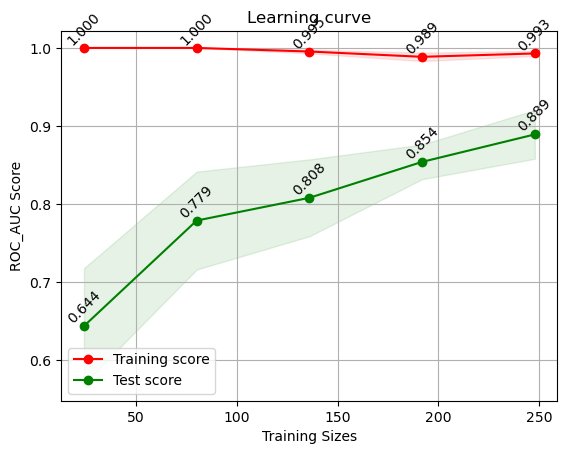

In [132]:
plot_learning_curve(ab, "Learning curve", X_train_over, y_train_over, X_test, y_test, cv=strat_k_fold,n_jobs=-1)
plt.show()

#### Support Machine Vector (SVM)

In [133]:
svm = SVC(probability=True)
svm.fit(X_train_over, y_train_over)
eval_classification(svm)

Accuracy (Train Set): 0.926
Accuracy (Test Set): 0.754
Precision (Train Set): 0.929
Precision (Test Set): 0.000
Recall (Train Set): 0.923
Recall (Test Set): 0.000
F1-Score (Train Set): 0.926
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.980
roc_auc (test-proba): 0.500

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.911
Accuracy (crossval test): 0.784
Precision (crossval train): 0.922
Precision (crossval test): 0.795
Recall (crossval train): 0.898
Recall (crossval test): 0.768
F1-Score (crossval train): 0.910
F1-Score (crossval test): 0.779
roc_auc (crossval train): 0.977
roc_auc (crossval test): 0.889


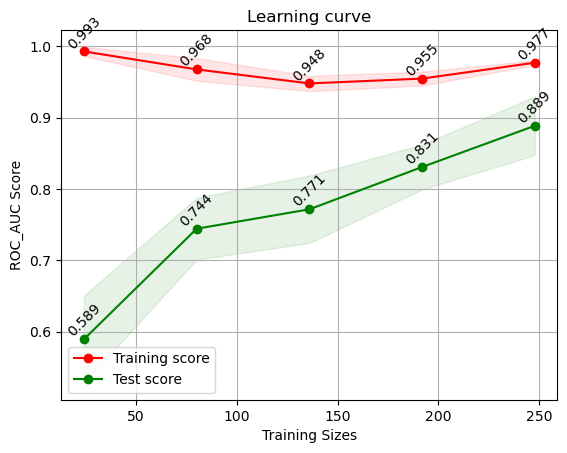

In [134]:
plot_learning_curve(svm, "Learning curve", X_train_over, y_train_over, X_test, y_test, cv=strat_k_fold,n_jobs=-1)
plt.show()

### Hyperparameter

In [102]:
from sklearn.model_selection import RandomizedSearchCV

#### Hyperparamer Logistic Regression

In [138]:
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
hyperparameters = dict(penalty=penalty, C=C)

lrt = RandomizedSearchCV(lr, hyperparameters, cv=strat_k_fold,scoring='roc_auc')
lrt.fit(X_train_over, y_train_over)
eval_classification(lrt)

Accuracy (Train Set): 0.671
Accuracy (Test Set): 0.754
Precision (Train Set): 0.663
Precision (Test Set): 0.000
Recall (Train Set): 0.697
Recall (Test Set): 0.000
F1-Score (Train Set): 0.679
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.773
roc_auc (test-proba): 0.801

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.696
Accuracy (crossval test): 0.623
Precision (crossval train): 0.688
Precision (crossval test): 0.628
Recall (crossval train): 0.716
Recall (crossval test): 0.632
F1-Score (crossval train): 0.702
F1-Score (crossval test): 0.627
roc_auc (crossval train): 0.775
roc_auc (crossval test): 0.704


In [136]:
show_best_hyperparameter(lrt)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### Hyperparameter Decision Tree

In [143]:
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50] 
max_features = ['auto', 'sqrt']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features)

dtt = RandomizedSearchCV(dt, hyperparameters, scoring='roc_auc', cv=strat_k_fold,random_state=42)
dtt.fit(X_train_over, y_train_over)
eval_classification(dtt)

Accuracy (Train Set): 0.868
Accuracy (Test Set): 0.456
Precision (Train Set): 0.875
Precision (Test Set): 0.293
Recall (Train Set): 0.858
Recall (Test Set): 0.857
F1-Score (Train Set): 0.866
F1-Score (Test Set): 0.436
roc_auc (train-proba): 0.953
roc_auc (test-proba): 0.551

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.856
Accuracy (crossval test): 0.719
Precision (crossval train): 0.871
Precision (crossval test): 0.734
Recall (crossval train): 0.837
Recall (crossval test): 0.684
F1-Score (crossval train): 0.853
F1-Score (crossval test): 0.707
roc_auc (crossval train): 0.940
roc_auc (crossval test): 0.801


In [140]:
show_best_hyperparameter(dtt)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 23, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### Hyperparameter k-Nearest Neigbors

In [144]:
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean','manhattan','minkowski']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm,metric=metric)

knnt = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', cv=strat_k_fold,random_state=42)
knnt.fit(X_train_over, y_train_over)
eval_classification(knnt)

Accuracy (Train Set): 0.787
Accuracy (Test Set): 0.509
Precision (Train Set): 0.791
Precision (Test Set): 0.111
Recall (Train Set): 0.781
Recall (Test Set): 0.143
F1-Score (Train Set): 0.786
F1-Score (Test Set): 0.125
roc_auc (train-proba): 0.860
roc_auc (test-proba): 0.397

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.944
Accuracy (crossval test): 0.681
Precision (crossval train): 1.000
Precision (crossval test): 0.693
Recall (crossval train): 0.887
Recall (crossval test): 0.645
F1-Score (crossval train): 0.940
F1-Score (crossval test): 0.667
roc_auc (crossval train): 0.979
roc_auc (crossval test): 0.732


In [145]:
show_best_hyperparameter(knnt)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}


#### Hyperparameter Random Forest

In [147]:
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rft = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', cv=strat_k_fold,random_state=42)
rft.fit(X_train_over, y_train_over)
eval_classification(rft)

Accuracy (Train Set): 0.939
Accuracy (Test Set): 0.772
Precision (Train Set): 0.947
Precision (Test Set): 1.000
Recall (Train Set): 0.929
Recall (Test Set): 0.071
F1-Score (Train Set): 0.938
F1-Score (Test Set): 0.133
roc_auc (train-proba): 0.989
roc_auc (test-proba): 0.432

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.943
Accuracy (crossval test): 0.868
Precision (crossval train): 0.955
Precision (crossval test): 0.911
Recall (crossval train): 0.929
Recall (crossval test): 0.819
F1-Score (crossval train): 0.942
F1-Score (crossval test): 0.860
roc_auc (crossval train): 0.992
roc_auc (crossval test): 0.924


In [148]:
show_best_hyperparameter(rft)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 46, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 74, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### Hyperparameter XGBoost

In [149]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xgbt = RandomizedSearchCV(xgb, hyperparameters, scoring='roc_auc', cv=strat_k_fold,random_state=42)
xgbt.fit(X_train_over, y_train_over)
eval_classification(xgbt)

Accuracy (Train Set): 0.984
Accuracy (Test Set): 0.772
Precision (Train Set): 0.993
Precision (Test Set): 1.000
Recall (Train Set): 0.974
Recall (Test Set): 0.071
F1-Score (Train Set): 0.984
F1-Score (Test Set): 0.133
roc_auc (train-proba): 0.999
roc_auc (test-proba): 0.424

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.975
Accuracy (crossval test): 0.855
Precision (crossval train): 0.982
Precision (crossval test): 0.889
Recall (crossval train): 0.968
Recall (crossval test): 0.813
F1-Score (crossval train): 0.975
F1-Score (crossval test): 0.847
roc_auc (crossval train): 0.997
roc_auc (crossval test): 0.925


In [150]:
show_best_hyperparameter(xgbt)

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.5, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 110, 'max_leaves': 0, 'min_child_weight': 2, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'hist', 'validate_parameters': 1, 'verbosity': None, 'lambda': 0.2, 'eta': 0.7777777777777778, 'alpha': 0.1}


#### Hyperparameter AdaBoost

In [151]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

abt = RandomizedSearchCV(ab, hyperparameters, scoring='roc_auc', cv=strat_k_fold,random_state=42)
abt.fit(X_train_over, y_train_over)
eval_classification(abt)

Accuracy (Train Set): 0.874
Accuracy (Test Set): 0.772
Precision (Train Set): 0.903
Precision (Test Set): 1.000
Recall (Train Set): 0.839
Recall (Test Set): 0.071
F1-Score (Train Set): 0.870
F1-Score (Test Set): 0.133
roc_auc (train-proba): 0.950
roc_auc (test-proba): 0.650

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.860
Accuracy (crossval test): 0.839
Precision (crossval train): 0.908
Precision (crossval test): 0.888
Recall (crossval train): 0.803
Recall (crossval test): 0.781
F1-Score (crossval train): 0.851
F1-Score (crossval test): 0.828
roc_auc (crossval train): 0.942
roc_auc (crossval test): 0.910


In [152]:
show_best_hyperparameter(abt)

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.09478947368421052, 'n_estimators': 100, 'random_state': None}


#### Hyperparameter SVM

In [153]:
C = [0.1, 1, 10]
kernel = ['linear', 'rbf']
degree = [2, 3, 4]
gamma = [0.1, 1, 10]

hyperparameters = dict(C=C, kernel=kernel, degree=degree, gamma=gamma)

svmt = RandomizedSearchCV(svm, hyperparameters, scoring='roc_auc', cv=strat_k_fold,random_state=42)
svmt.fit(X_train_over, y_train_over)
eval_classification(svmt)

Accuracy (Train Set): 0.942
Accuracy (Test Set): 0.754
Precision (Train Set): 0.936
Precision (Test Set): 0.000
Recall (Train Set): 0.948
Recall (Test Set): 0.000
F1-Score (Train Set): 0.942
F1-Score (Test Set): 0.000
roc_auc (train-proba): 0.989
roc_auc (test-proba): 0.500

-------CROSS-VALIDATION-------
Accuracy (crossval train): 0.944
Accuracy (crossval test): 0.842
Precision (crossval train): 0.947
Precision (crossval test): 0.820
Recall (crossval train): 0.940
Recall (crossval test): 0.877
F1-Score (crossval train): 0.943
F1-Score (crossval test): 0.847
roc_auc (crossval train): 0.990
roc_auc (crossval test): 0.919


In [156]:
models = [lrt, dtt, knnt, rft, xgbt, abt, svmt]
scores = []

for model in models:
    if model == lrt:
        name = "Logistic Regression"
    elif model == dtt:
        name = "Decision Tree"
    elif model == knnt:
        name = "KNN"
    elif model == rft:
        name = "Random Forest"
    elif model == xgbt:
        name = "XGBoost"
    elif model == abt:
        name = "AdaBoost"
    elif model == svmt:
        name = "SVM"
    score = cross_validate(model, X_train_over, y_train_over, cv=strat_k_fold, scoring='roc_auc', return_train_score=True)
    scores.append([name, score['train_score'].mean(), score['test_score'].mean()])
    
model_comp = pd.DataFrame(scores, columns=['Model', 'roc_auc (train)', 'roc_auc (test)'])
model_comp

,Model,roc_auc (train),roc_auc (test)
0,Logistic Regression,0.775169,0.704058
1,Decision Tree,0.939672,0.800520
2,KNN,0.978642,0.732050
3,Random Forest,0.992001,0.923829
4,XGBoost,0.996839,0.925286
5,AdaBoost,0.942345,0.909677
6,SVM,0.989789,0.919043


Dari skor yang diberikan, model `Random Forest` dan `XGBoost` memiliki skor ROC-AUC yang paling tinggi untuk data test dan skor ROC-AUC yang hampir sama. Namun, model `Random Forest` memiliki skor ROC-AUC yang lebih tinggi untuk data train dibandingkan model `XGBoost` ataupun `SVM`. Oleh karena itu, model `Random Forest` dianggap sebagai model yang paling robust dibandingkan dengan model lainnya.
<br>
<br>
Hal ini dikarenakan model `Random Forest` memiliki skor ROC-AUC yang cukup tinggi untuk data test dan data train, dan perbedaan skor antara data train dan data test tidak terlalu besar. Hal ini menunjukkan bahwa model tersebut mampu menangani kasus overfitting yang mungkin terjadi. Sementara itu, model lain seperti model `Logistic Regression`, `KNN`, dan `AdaBoost` memiliki skor ROC-AUC yang lebih rendah untuk data test dibandingkan data train, menunjukkan bahwa model tersebut mungkin overfitting.

In [158]:
def get_feature_importance(model, X_train):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_
    else:
        return None

    df_fi = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
    df_fi = df_fi.sort_values(by='importance', ascending=False)
    
    return df_fi

In [159]:
best_model = rft.best_estimator_

feature_importance = get_feature_importance(best_model, X_train)
feature_importance

,feature,importance
10,LamaBekerja,0.466983
9,umur,0.062098
7,JumlahKetidakhadiran,0.052486
8,TingkatPendidikan,0.051000
3,SkorSurveyEngagement,0.047843
2,PerformancePegawai,0.046022
4,SkorKepuasanPegawai,0.040939
5,JumlahKeikutsertaanProjek,0.036297
1,JenjangKarir,0.027748
28,Pekerjaan_Software Engineer (Back End),0.020239
